<a href="https://colab.research.google.com/github/juli1123/Contoh-studi-kasus-/blob/main/Rental_PS_K_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# Data penyewaan PS
data = {
    "Durasi Sewa (jam)": [2, 1, 5, 3, 6],
        "Waktu Sewa (jam)": [18, 15, 20, 10, 22],
            "Pengeluaran (Rp)": [30000, 15000, 75000, 45000, 90000],
                "Frekuensi Penyewaan (kali)": [3, 1, 6, 4, 7]
                }

In [ ]:
# Konversi ke DataFrame
df = pd.DataFrame(data)

In [ ]:
# Menampilkan data
print("Data Rental PS:")
print(df)

Data Rental PS:
   Durasi Sewa (jam)  Waktu Sewa (jam)  Pengeluaran (Rp)  \
0                  2                18             30000   
1                  1                15             15000   
2                  5                20             75000   
3                  3                10             45000   
4                  6                22             90000   

   Frekuensi Penyewaan (kali)  
0                           3  
1                           1  
2                           6  
3                           4  
4                           7  


In [ ]:
# Membuat model K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(df)

In [ ]:
# Menampilkan centroid dan hasil clustering
print("\nCentroid:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=df.columns[:-1]))


Centroid:
   Durasi Sewa (jam)  Waktu Sewa (jam)  Pengeluaran (Rp)  \
0                5.5              21.0           82500.0   
1                1.5              16.5           22500.0   
2                3.0              10.0           45000.0   

   Frekuensi Penyewaan (kali)  
0                         6.5  
1                         2.0  
2                         4.0  


In [ ]:
print("\nHasil Clustering:")
print(df)


Hasil Clustering:
   Durasi Sewa (jam)  Waktu Sewa (jam)  Pengeluaran (Rp)  \
0                  2                18             30000   
1                  1                15             15000   
2                  5                20             75000   
3                  3                10             45000   
4                  6                22             90000   

   Frekuensi Penyewaan (kali)  Cluster  
0                           3        1  
1                           1        1  
2                           6        0  
3                           4        2  
4                           7        0  


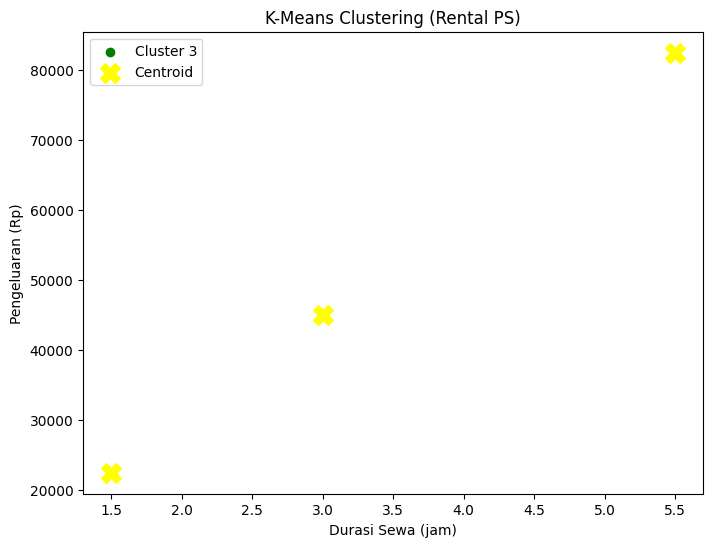

In [ ]:
# Visualisasi hasil clustering
colors = ['red', 'blue', 'green']
plt.figure(figsize=(8, 6))
for i in range(3):
    cluster_data = df[df['Cluster'] == i]

plt.scatter(cluster_data['Durasi Sewa (jam)'], cluster_data['Pengeluaran (Rp)'],
                color=colors[i], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2],
            color='yellow', marker='X', s=200, label='Centroid')

plt.title('K-Means Clustering (Rental PS)')
plt.xlabel('Durasi Sewa (jam)')
plt.ylabel('Pengeluaran (Rp)')
plt.legend()
plt.show()